In [126]:
from simpledbf import Dbf5

dbf = Dbf5('Tubagens.dbf')
df = dbf.to_dataframe()
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index


df.drop(cols_to_drop, axis=1, inplace = True)
df.head()

"""
    ids noutros files??? 
    'OBJECTID', 'GlobalID', 'IDEntidade', 'IDInfraest', 'IDGestao','IDLocaliza',

    diametro interno dos tubos
    tub['Observacoe'].unique()


    tub['EstadoCons'].unique()
    array(['Bom', 'Razoável', 'Regular', 'bom', 'Deficiente', 'NC',
           'Razoável/Deficiente', 'Razoavel/Deficiente', 'Razoavel', 'Mau'],
          dtype=object)
    
    --- importante para ligar com caudal(ZMC_Bolho)
    tub['Observac_1'].unique()
    array([nan, 'ZMC_Sanguinheira', 'ZMC_Cantanhede', 'ZMC_Povoa da Lomba',
       'ZMC_Enxofães', 'ZMC_Outil', 'ZMC_Fornos', 'ZMC_Casal',
       'ZMC_ Varziela', 'ZMC_Portunhos', 'ZMC_Ançã', 'ZMC_Cordinhã',
       'ZMC_Praia da Tocha', 'ZMC_Tocha', 'ZMC_Sepins', 'ZMC_Murtede',
       'ZMC_Bolho', 'ZMC_Lemede', 'ZMC_Covões', 'ZMC_Cadima',
       'ZMC_Ameixoeira', 'Descarga de Superficie', 'ZMC_ Sepins',
       'ZMC_São Caetano', 'ZMCOutil', 'ZMC_Vilamar', 'ZMC_ São Caetano',
       'ZMC Vilamar', 'ZMC_ Cantanhede', 'ZMC_Póvoa da Lomba',
       'ZMC_ Pocariça', 'ZMC Cochadas'], dtype=object)
    
    --- altura
    tub['TipoCotaZ'].unique()
    ['Soleira', 'NC']
    
    --- funcao ver noutro ficheiro...
    tub['funcao'].unique()
    [3, 1, 2, 7]
    
    
    --- Tipo de escoamento
    ['Seccão cheia gravitico', 'SeccaoCheiaGravitico',
     'Seccao cheia gravitico', 'SeccaoCheiaElevatorio',
     'Secção cheia elevatoria', 'Sessão cheia gravitico', nan,
     'Seccao cheia elevatorio']
    
    -- DN  Diametro Nominal
    [ 90.,  63., 125., 160.,  75., 110.,  50.,  60., 150., 350., 250.,
    80., 200., 140., 100., 300., 500., 400., 693., 450., 800.,   0.]
    
    -- DNInterno 
    [ 0.,  1., 90.]
    
    -- PN    pressao nominal
    "pressão de serviço máxima ou pressão nominal"
    [  0,  10,  63,   1,  16, 100]
    
    Rugusidade
    [140.,   1.]
    
    TipoAssent
    ['Enterrado', 'Tunel', nan, 'CeuAberto', 'Galeria', 'Vala',
       'Apoiado', 'Aqueduto']
       
    TipoRecobr
    ['Alcatrão', 'Alcatrao', 'Asfalto', 'SemRecobrimento', nan, 'NA',
       'NC', 'Areia', 'EnvolvimentoBetao', 'AlmofadaTerraMacia']

    Shape_Leng metros?
    tub['Shape_Leng'].sum()
    685214.2183146689
          
"""

tub = df.copy()[['EstadoCons', 'Observac_1','AnoInstala', 'Reabilitad', 'DataReabil',
       'Funcao', 'TipoAgua', 'TipoEscoam', 'Material',
       'Rugosidade', 'TipoAssent', 'TipoRecobr', 'Shape_Leng',]]
print(df.columns)
tub.head()

Index(['OBJECTID', 'GlobalID', 'IDEntidade', 'IDInfraest', 'IDGestao',
       'IDLocaliza', 'Utilizador', 'DataDigita', 'UltimoEdit', 'DataActual',
       'Distrito', 'Freguesia', 'Arruamento', 'Localizaca', 'Descricao',
       'FonteInfor', 'Observacoe', 'EstadoCons', 'Observac_1', 'TipoCotaZ',
       'AnoInstala', 'DataEntrad', 'Reabilitad', 'DataReabil', 'RegistoInt',
       'Funcao', 'TipoAgua', 'TipoEscoam', 'Material', 'DN', 'DNInterno', 'PN',
       'Rugosidade', 'Profundida', 'TipoAssent', 'TipoRecobr', 'Shape_Leng',
       'Empreiteir', 'CadType', 'Color', 'LineWt', 'Layer', 'Handle',
       'RefName', 'Class', 'LTScale', 'CadModel', 'ExtZ', 'Elevation',
       'LyrName', 'LvlDesc', 'LyrColor', 'LyrLineWt', 'LyrOn', 'LyrHandle',
       'TxtValue', 'TxtMemo', 'TxtGenType', 'TxtJust', 'VertAlign', 'TxtStyle',
       'TxtFont', 'DocName', 'DocPath', 'XDList'],
      dtype='object')


EstadoCons    6509
Observac_1    2838
AnoInstala    6509
Reabilitad    6509
DataReabil       9
Funcao        6509
TipoAgua      6501
TipoEscoam    6498
Material      6509
Rugosidade    6509
TipoAssent    6472
TipoRecobr    6480
Shape_Leng    6509
dtype: int64

In [121]:
 tub.groupby(['AnoInstala']).agg({'AnoInstala': 'count', 'Rugosidade': 'mean', 'Shape_Leng': { 'min', 'max', 'mean' }})

AnoInstala  Rugosidade  Shape_Leng                         
                count        mean        mean         min          max
AnoInstala                                                            
0                   2  140.000000   47.275829    1.350075    93.201582
200                 5  140.000000    5.764059    0.144326    16.063056
1970              176  137.630682  121.786929    0.336085  1634.929503
1971               45  140.000000   95.561514    0.359874  1337.912887
1972               48  131.312500   59.397185    0.051289   394.371742
1977              105  137.352381  124.549537    0.085921   910.250662
1979              104  140.000000  132.409480    0.048578  1340.606716
1980              185  136.243243  149.773438    0.018831  1010.690056
1981               48  140.000000  128.984735    1.305217   851.790951
1982              439  139.683371  111.770116    0.126869  1044.195376
1983               59  140.000000  135.427987    0.067530  1276.064037
1984               22  140.000000  252.066172    0.120861  1052.769256
1987              592  139.530405  100.329583    0.025654  1780.913942
1988                4  140.000000  251.354256   73.300056   333.401330
1990              273  140.000000  124.822616    0.482765  1009.351644
1991               12  140.000000   45.541843    0.552039   374.892728
1992              165  140.000000  165.301198    0.009751  1736.227970
1993              137  140.000000  108.135185    0.021965   688.088245
1994               91  140.000000  114.061476    1.046057   746.717747
1995              476  139.707983  138.777114    0.271934  1860.132216
1996              311  140.000000  120.439028    0.779566  1324.315958
1997              183  139.240437  158.496722    0.218730  1896.605684
1998              466  139.403433  112.723935    0.016000  2102.301794
1999                1  140.000000   17.940368   17.940368    17.940368
2000               46  140.000000   94.002740    0.682676   438.243484
2001              289  140.000000   98.412268    0.716174   785.217458
2002                3  140.000000  430.448245   52.533154  1030.826881
2003              158  140.000000  109.044988    0.416675  1318.177221
2004              102  140.000000   66.298268    0.286074   396.948544
2005               71  140.000000   95.834936    0.546758   675.906073
2006              160  140.000000   49.118539    0.222387   345.487251
2008               17  140.000000  153.460981    1.917479   716.302420
2009                2  140.000000  304.754121  235.120507   374.387735
2010               35  140.000000  105.896302    0.795640   676.749937
2011               30  140.000000   89.778354    2.220391   368.614036
2012               23  140.000000   94.364653    0.323045   794.029978
2013               37  140.000000  118.793901    0.229694   702.897025
2014               44  140.000000   81.732872    0.236690  1259.013122
2015              270  140.000000   85.361366    0.165829   923.948548
2016               24  140.000000   97.760368    5.311823   747.847336
2017              124  140.000000  120.296627    0.353734  1670.987926
2018              680  140.000000   44.933489    0.004219   825.175250
2019               90  140.000000  136.085460    0.223513   760.431594
2020               69  140.000000   79.857089    0.165017  1062.726339
2021               12  140.000000   84.964694   23.366145   302.534255
2022              274  140.000000   67.376937    0.071546   911.128164

In [100]:

tub['Reabilitad'].unique()


array([0, 1], dtype=int64)

Text(0.5, 0, 'Year')

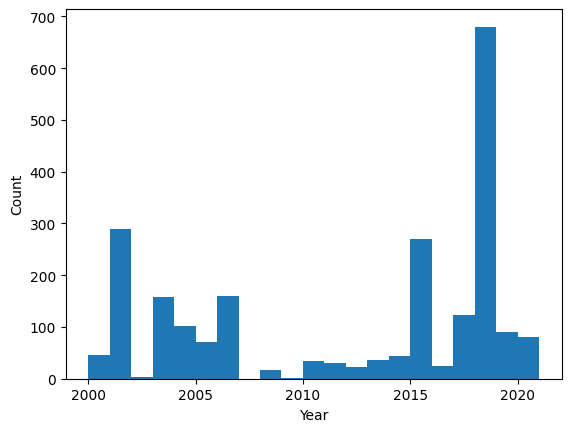

In [101]:

import matplotlib.pyplot as plt 
plt.hist(tub['AnoInstala'], bins=range(2000,2022,1))

plt.ylabel('Count')
plt.xlabel('Year')

In [110]:
 tub.groupby(['TipoRecobr']).agg({'AnoInstala':'count', 'Shape_Leng': {'mean','min','max', 'std'} })

AnoInstala   Shape_Leng                                   
                        count          max         std        min        mean
TipoRecobr                                                                   
Alcatrao                 6371  2102.301794  176.655926   0.004219  107.359724
AlmofadaTerraMacia          1    14.039562         NaN  14.039562   14.039562
Areia                       1    86.131502         NaN  86.131502   86.131502
Asfalto                     4   178.481924   87.869276   0.518963   46.756722
EnvolvimentoBetao          29     7.612569    1.839621   0.248471    2.041180
NA                         17   157.592477   37.223048   0.414831   16.020907
NC                          1     2.635531         NaN   2.635531    2.635531
SemRecobrimento            56     7.363542    1.308961   0.016000    1.316294

In [103]:
tub['TipoRecobr'] = tub['TipoRecobr'].replace(['Alcatrão'],'Alcatrao')

In [118]:
 tub.groupby(['TipoRecobr']).agg({'AnoInstala':'count', 'Shape_Leng': {'mean','min','max'} }).apply(lambda x:100 * x / float(x.sum()))
    

AnoInstala Shape_Leng                      
                        count        max        min       mean
TipoRecobr                                                    
Alcatrao            98.317901  82.244566   0.004056  38.856016
AlmofadaTerraMacia   0.015432   0.549245  13.498401   5.081249
Areia                0.015432   3.369568  82.811522  31.173022
Asfalto              0.061728   6.982427   0.498959  16.922360
EnvolvimentoBetao    0.447531   0.297813   0.238894   0.738751
NA                   0.262346   6.165207   0.398841   5.798344
NC                   0.015432   0.103105   2.533943   0.953861
SemRecobrimento      0.864198   0.288071   0.015383   0.476398

In [123]:
tub.groupby(['Observac_1']).agg({'AnoInstala':'count', 'Shape_Leng': {'mean','min','max'} })

AnoInstala   Shape_Leng                        
                            count          max         min        mean
Observac_1                                                            
Descarga de Superficie          1     3.005590    3.005590    3.005590
ZMC Cochadas                    1    32.957899   32.957899   32.957899
ZMC Vilamar                     1    68.009151   68.009151   68.009151
ZMCOutil                        2     3.949387    0.517626    2.233507
ZMC_ Cantanhede                 2   493.421050  224.995240  359.208145
ZMC_ Pocariça                   5   177.277662    0.407720   37.139524
ZMC_ Sepins                     1    38.277422   38.277422   38.277422
ZMC_ São Caetano                2    86.886581   58.341130   72.613855
ZMC_ Varziela                 139   785.217458    0.229694   92.970180
ZMC_Ameixoeira                 12   374.892728    0.552039   45.541843
ZMC_Ançã                      129   620.097809    0.265761   72.121348
ZMC_Bolho                     126  1138.869453    0.218730  103.694965
ZMC_Cadima                      6   476.935056    0.921962  173.239134
ZMC_Cantanhede                 40   575.785257    0.816632   76.272549
ZMC_Casal                      57   819.857001    0.120861  109.482689
ZMC_Cordinhã                  260  1728.743053    0.016000  119.901310
ZMC_Covões                     21   488.676763    0.947916   84.553740
ZMC_Enxofães                  102  1229.838099    0.436337  131.891729
ZMC_Fornos                    118  1224.992275    0.797288  116.971930
ZMC_Lemede                      6   101.462360    1.052059   37.372616
ZMC_Murtede                   168  1860.132216    0.271934  124.283966
ZMC_Outil                     207   946.045666    0.041080  111.796599
ZMC_Portunhos                 316  1276.064037    0.138704   63.095254
ZMC_Povoa da Lomba             86  1780.913942    0.051289  113.641230
ZMC_Praia da Tocha            160   339.164651    0.048578   49.312532
ZMC_Póvoa da Lomba              2    61.503303   45.982433   53.742868
ZMC_Sanguinheira              168  1583.661979    0.018831  193.105691
ZMC_Sepins                    206   845.722623    0.069069   94.290967
ZMC_São Caetano                 1    14.654113   14.654113   14.654113
ZMC_Tocha                     491  1340.606716    0.126869  122.243492
ZMC_Vilamar                     2   286.105228   62.066354  174.085791

In [125]:
tub.groupby(['Material']).agg({'AnoInstala':'count', 'Shape_Leng': {'mean','min','max'} }).apply(lambda x:100 * x / float(x.sum()))

AnoInstala Shape_Leng                      
                                    count        max        min       mean
Material                                                                  
Aco                              0.261177   0.012575   0.013040   0.041821
BetaoMedio                       0.046090   0.212020   0.062222   0.664143
FC                               7.681672  18.362345   0.004567   8.300081
FF                               0.015363  10.957378  99.908216  63.096925
FFD                              4.332463  21.676056   0.001504   8.749267
PEAD                             1.797511   9.176831   0.002412   4.898847
PEAD - Polietileno de alta de*  17.544938  17.228938   0.000397   4.307403
PVC                             64.157321  17.901604   0.000917   6.610374
Polietileno de alta densidade    4.163466   4.472252   0.006726   3.331140